In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [51]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)

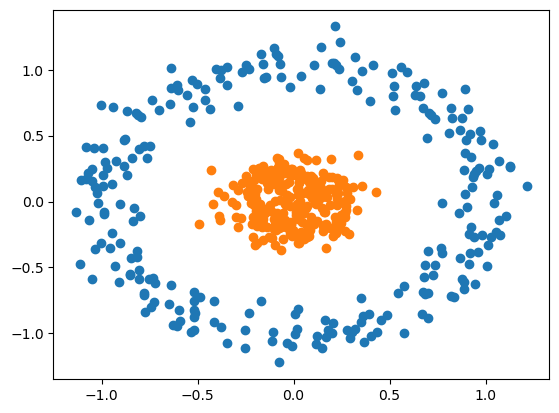

In [52]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [53]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [54]:
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 981us/step - loss: 0.6953 - accuracy: 0.4980
Epoch 2/100
25/25 [==============================] - 0s 875us/step - loss: 0.6940 - accuracy: 0.5840
Epoch 3/100
25/25 [==============================] - 0s 823us/step - loss: 0.6930 - accuracy: 0.5220
Epoch 4/100
25/25 [==============================] - 0s 833us/step - loss: 0.6929 - accuracy: 0.4480
Epoch 5/100
25/25 [==============================] - 0s 914us/step - loss: 0.6945 - accuracy: 0.5400
Epoch 6/100
25/25 [==============================] - 0s 897us/step - loss: 0.6914 - accuracy: 0.6520
Epoch 7/100
25/25 [==============================] - 0s 869us/step - loss: 0.6906 - accuracy: 0.4960
Epoch 8/100
25/25 [==============================] - 0s 986us/step - loss: 0.6869 - accuracy: 0.6200
Epoch 9/100
25/25 [==============================] - 0s 911us/step - loss: 0.6851 - accuracy: 0.5640
Epoch 10/100
25/25 [==============================] - 0s 887us/step - loss: 0.6818 - accura

Text(0.5, 0, 'epoch')

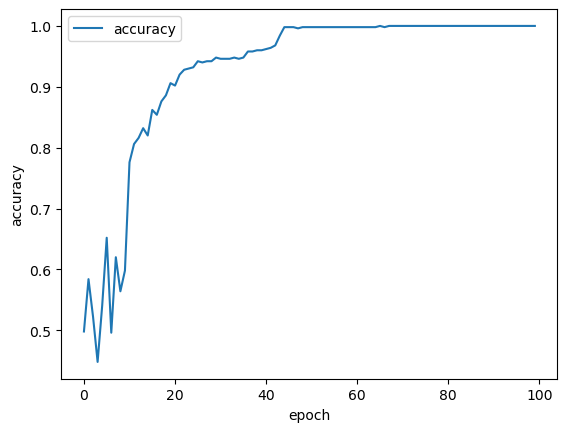

In [55]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

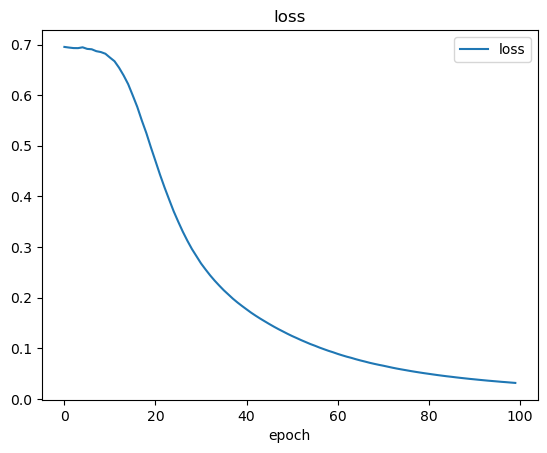

In [56]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [60]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 732us/step


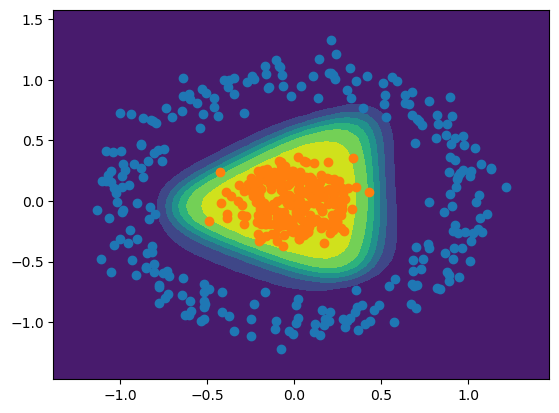

In [61]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

1/1 [==============================] - 0s 23ms/step
Prediction is:  [[0.0627345]]


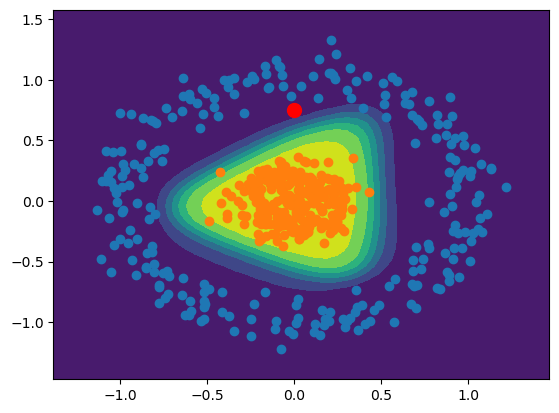

In [62]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
 
x = 0
y = 0.75
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)